In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("LoanApprovalPrediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,0.772277,5411.427723,1562.978059,144.566337,341.869307,0.859406
std,1.016542,6127.874416,2564.980770,81.306177,64.900341,0.347947
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000
25%,0.000000,2895.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3833.000000,1126.000000,128.000000,360.000000,1.000000
75%,2.000000,5818.000000,2253.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 1 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            505 non-null    object 
 1   Gender             505 non-null    object 
 2   Married            505 non-null    object 
 3   Dependents         505 non-null    float64
 4   Education          505 non-null    object 
 5   Self_Employed      505 non-null    object 
 6   ApplicantIncome    505 non-null    int64  
 7   CoapplicantIncome  505 non-null    float64
 8   LoanAmount         505 non-null    float64
 9   Loan_Amount_Term   505 non-null    float64
 10  Credit_History     505 non-null    float64
 11  Property_Area      505 non-null    object 
 12  Loan_Status        505 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 55.2+ KB


In [9]:
### We can also remove the column Loan ID which is not going to give any relevant information for analysis
df.drop(["Loan_ID"],axis=1,inplace = True)

In [10]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
593,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
### Now we need to convert all the data in categorical form so that it can be used for decision tree 


##for column in ['Gender', 'Married','Education','Self_Employed','Property_Area']:
  ##  dummies = pd.get_dummies(df[column], prefix=column)
    #df[dummies.columns] = dummies
    #df=pd.concat([df,dummies])

In [12]:
df=pd.get_dummies(df, columns = ['Gender', 'Married','Education','Self_Employed','Property_Area'])

In [13]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.0,2900,0.0,71.0,360.0,1.0,Y,1,0,1,0,1,0,1,0,1,0,0
594,3.0,4106,0.0,40.0,180.0,1.0,Y,0,1,0,1,1,0,1,0,1,0,0
595,1.0,8072,240.0,253.0,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1
596,2.0,7583,0.0,187.0,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1


In [14]:
y=df["Loan_Status"]
X=df.drop("Loan_Status",axis=1)

In [15]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.0,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
594,3.0,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
595,1.0,8072,240.0,253.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
596,2.0,7583,0.0,187.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [16]:
X.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [17]:
y.name

'Loan_Status'

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [19]:
dTree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
from sklearn import tree
print(tree.export_text(dTree))

|--- feature_5 <= 0.50
|   |--- feature_2 <= 8115.00
|   |   |--- feature_3 <= 488.00
|   |   |   |--- feature_1 <= 4961.50
|   |   |   |   |--- class: N
|   |   |   |--- feature_1 >  4961.50
|   |   |   |   |--- class: N
|   |   |--- feature_3 >  488.00
|   |   |   |--- class: Y
|   |--- feature_2 >  8115.00
|   |   |--- class: Y
|--- feature_5 >  0.50
|   |--- feature_4 <= 420.00
|   |   |--- feature_14 <= 0.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- class: Y
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- class: Y
|   |   |--- feature_14 >  0.50
|   |   |   |--- feature_3 <= 302.00
|   |   |   |   |--- class: Y
|   |   |   |--- feature_3 >  302.00
|   |   |   |   |--- class: N
|   |--- feature_4 >  420.00
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: N
|   |   |--- feature_0 >  0.50
|   |   |   |--- feature_2 <= 1734.00
|   |   |   |   |--- class: N
|   |   |   |--- feature_2 >  1734.00
|   |   |   |   |--- class: Y



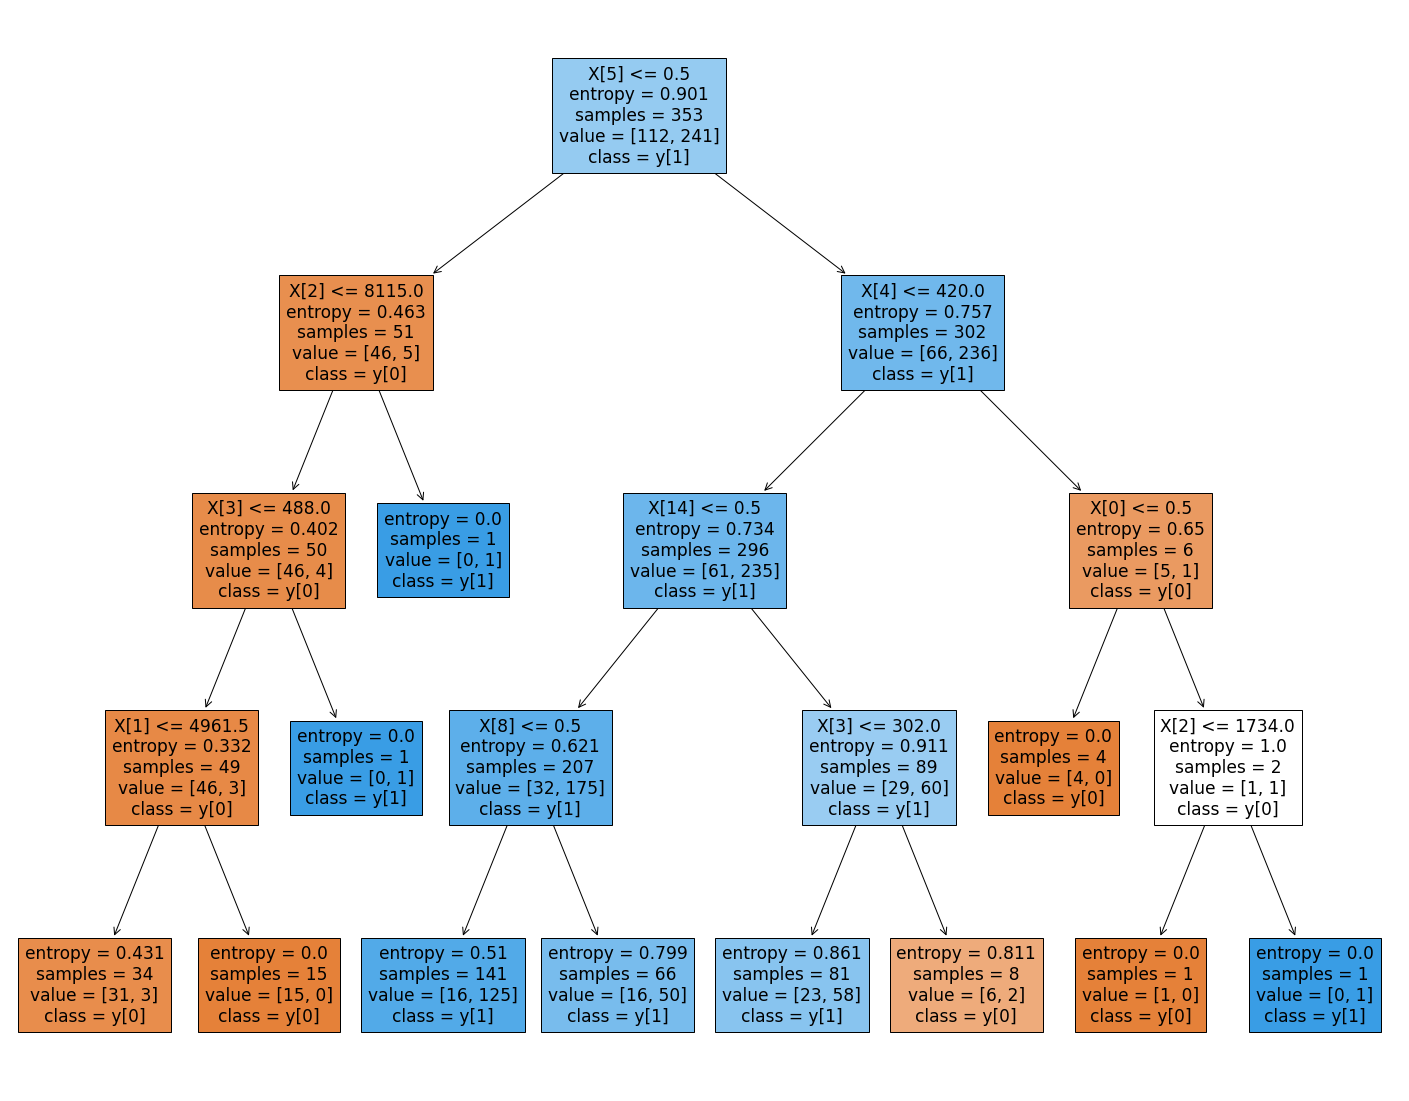

In [21]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(dTree,class_names=True,filled=True)

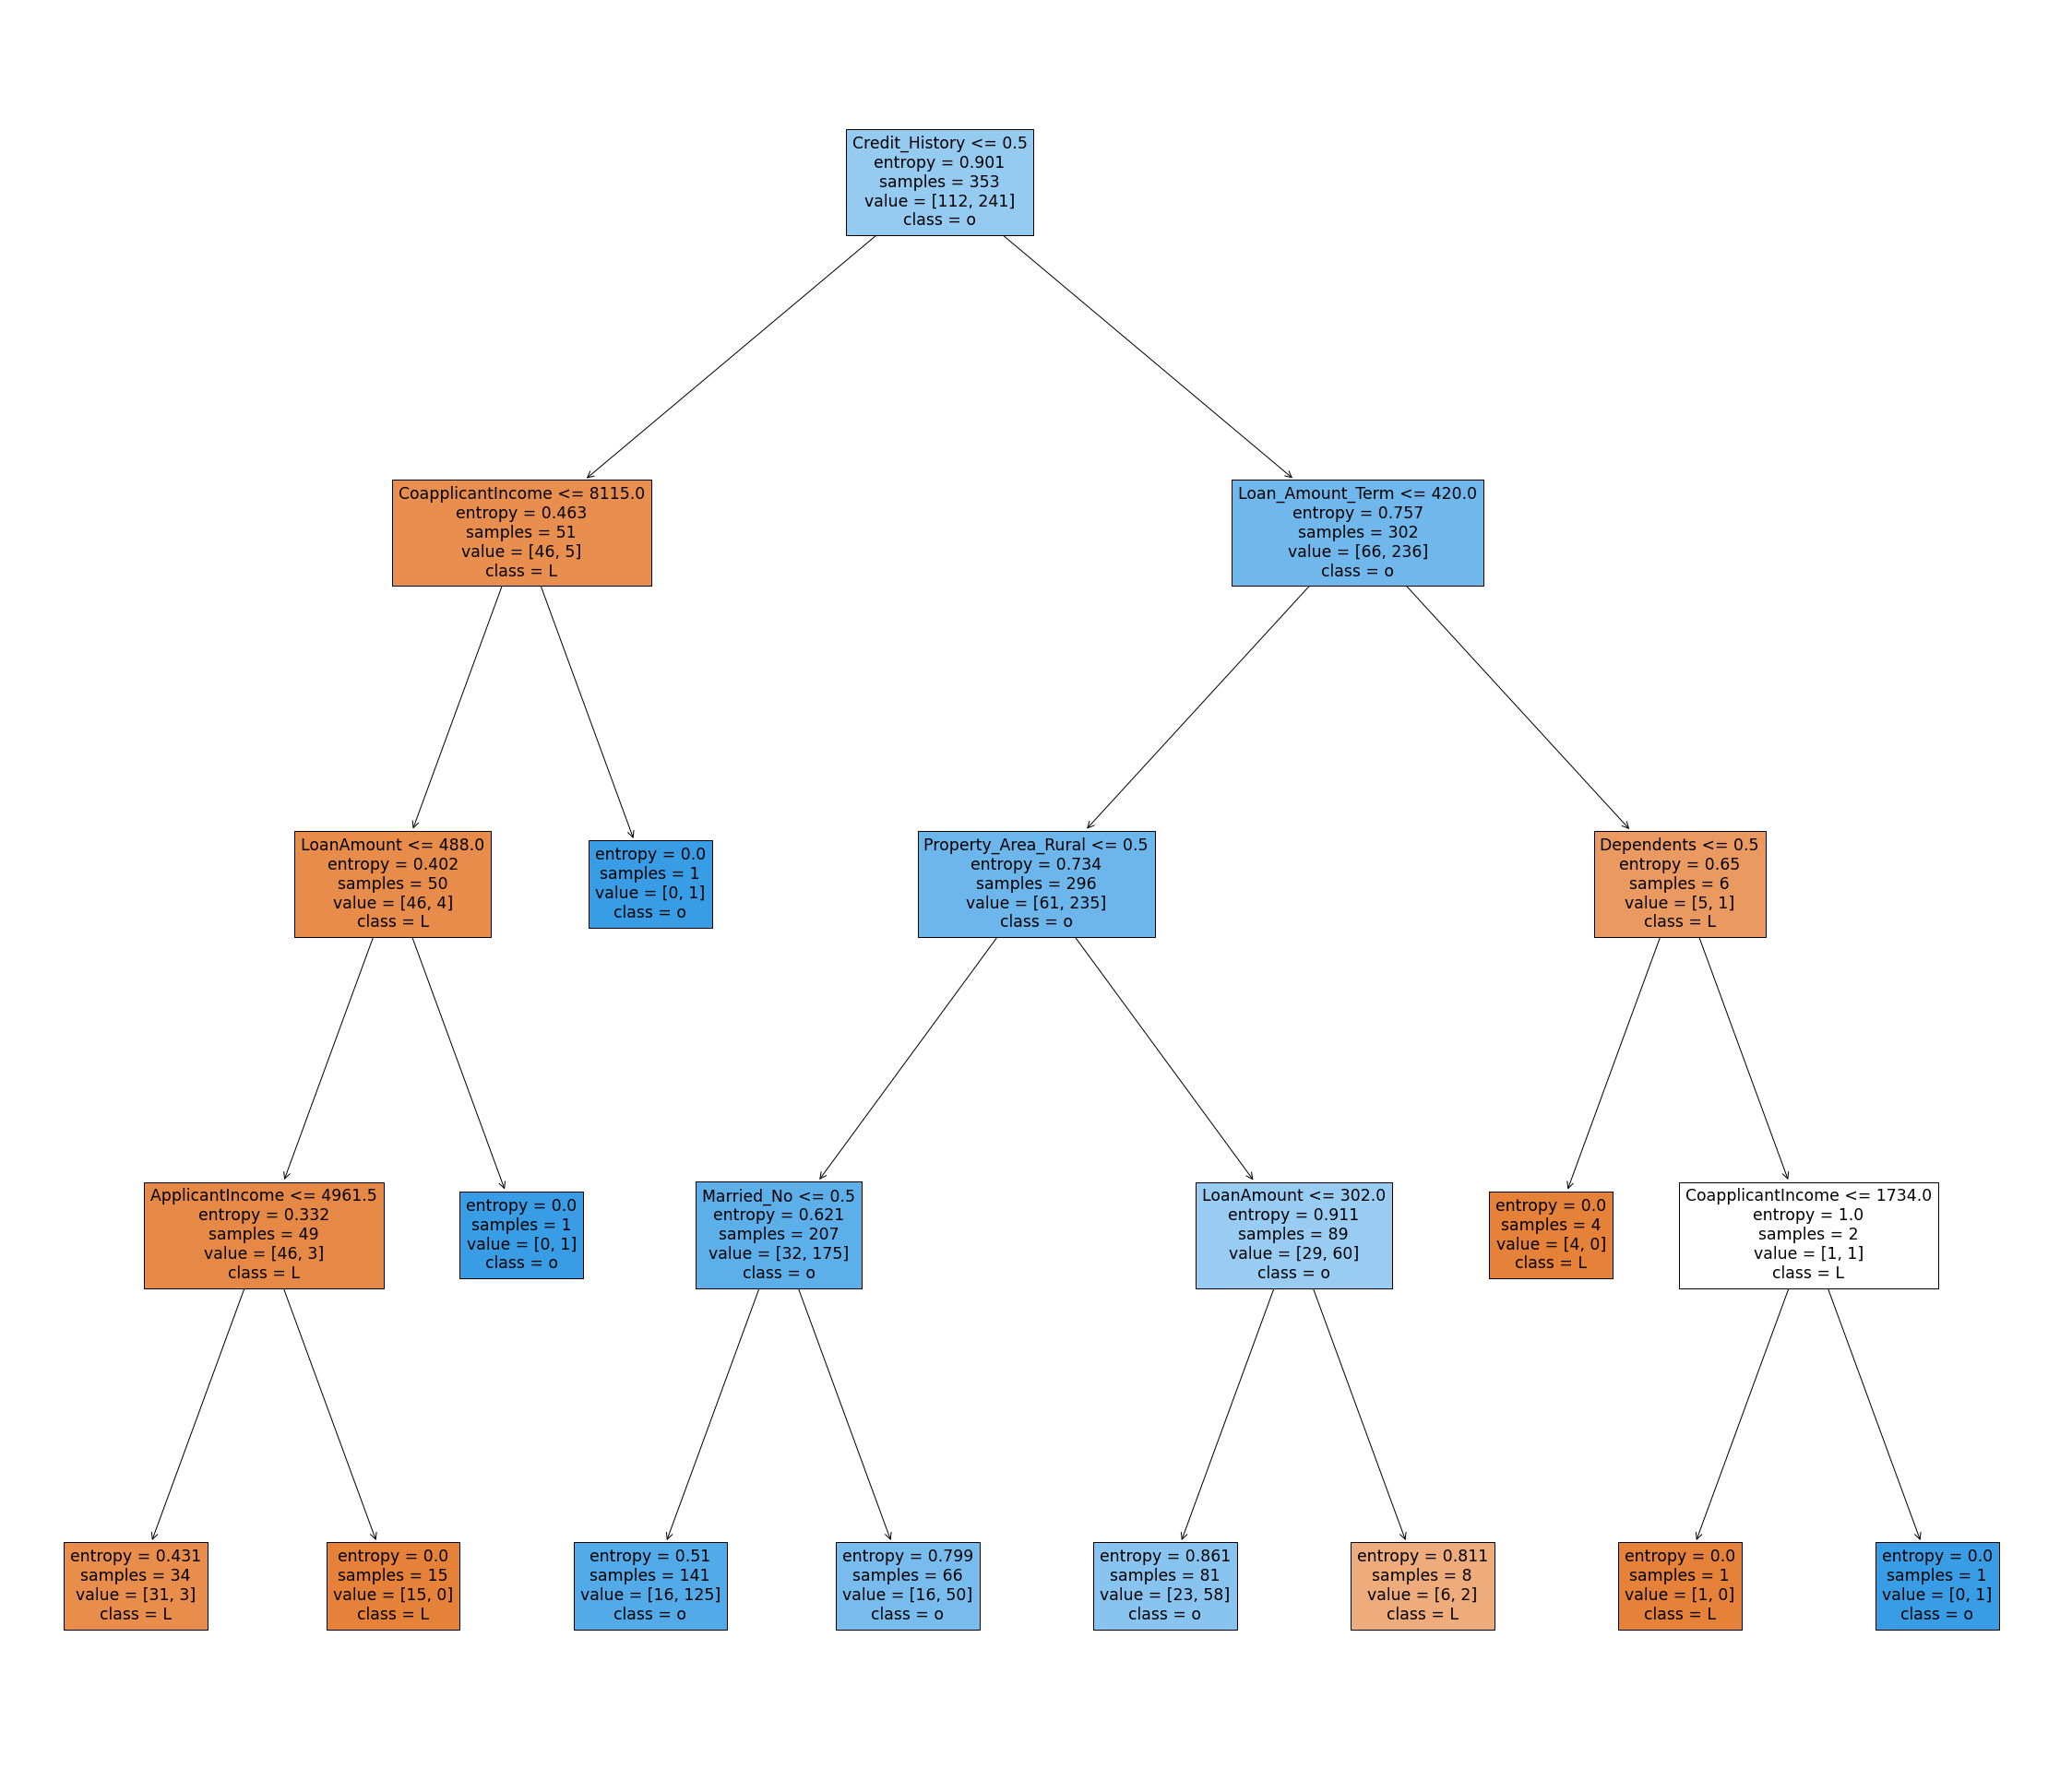

In [22]:
features =X.columns
classes = y.name

plt.figure(figsize=(40, 35))
tree.plot_tree(dTree,
          feature_names=features,
          class_names=classes,
          filled=True); 

In [23]:
predTree=dTree.predict(X_test)

In [24]:
print(predTree[0:5])
print(y_test[0:5])

['Y' 'Y' 'N' 'Y' 'N']
266    Y
166    Y
454    N
363    Y
301    N
Name: Loan_Status, dtype: object


In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy :", metrics.accuracy_score(y_test,predTree))

DecisionTree's Accuracy : 0.8092105263157895
